In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

## Data preperation

In [227]:
weather = pd.read_csv('weather.csv')
polution = pd.read_excel('smog.xlsx')

In [228]:
cols_to_drop = weather.columns[-5:]
weather = weather.drop(columns=cols_to_drop).set_index('datetime')

In [229]:
polution = polution.iloc[:, [0, -1]].set_index('Data')
weather.index = pd.to_datetime(weather.index)
polution.index = pd.to_datetime(polution.index, format='mixed')

In [231]:
data = pd.merge(weather, polution, left_index=True, right_index=True).rename(columns={'mean': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

## Data visualization

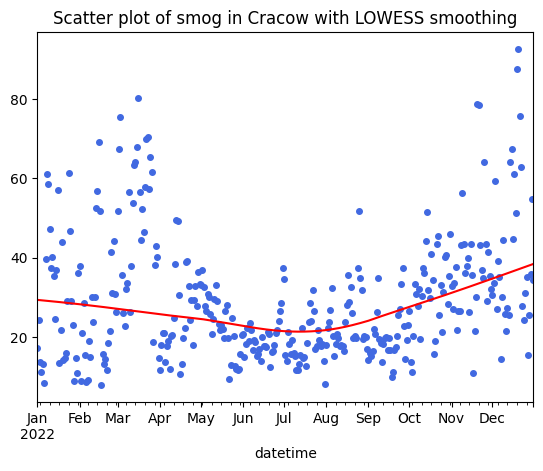

In [243]:
data.smog.plot(style='.', markersize=8, color='royalblue')
smoothed = lowess(data.smog.values, data.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='red')
plt.title('Scatter plot of smog in Cracow with LOWESS smoothing')
plt.show()

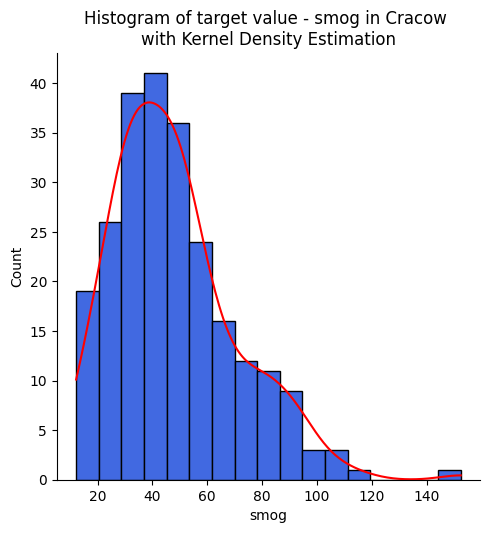

In [55]:
sns.displot(data['smog'], kde=True, color='red', facecolor='royalblue')
plt.title('Histogram of target value - smog in Cracow \nwith Kernel Density Estimation')
plt.show()

In [106]:
data.smog.describe()

count    241.000000
mean      47.924066
std       22.509102
min       12.200000
25%       31.500000
50%       44.300000
75%       57.600000
max      152.400000
Name: smog, dtype: float64

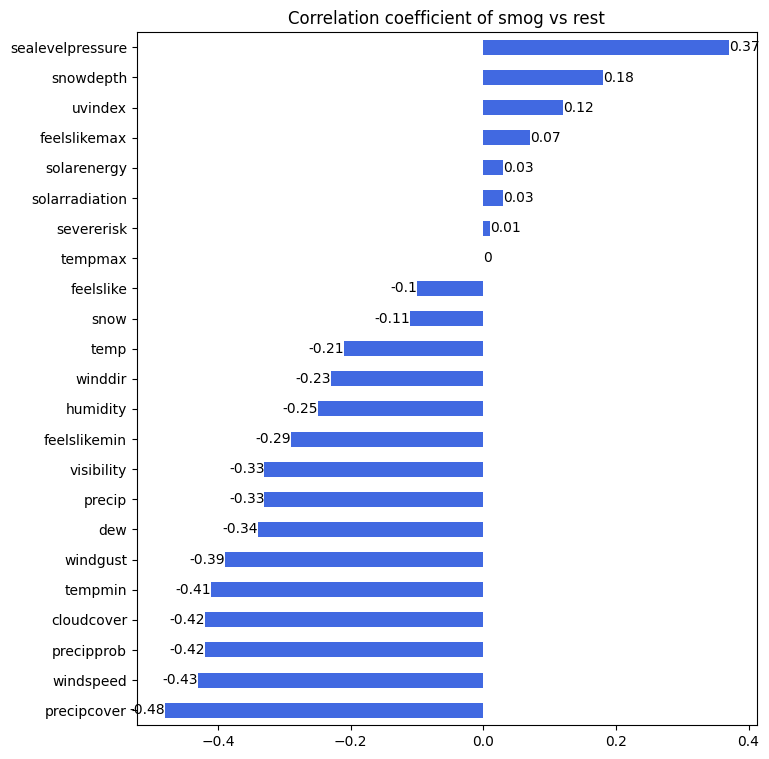

In [105]:
plt.figure(figsize=(8, 9))
ax = data.corr().smog.drop(index='smog').sort_values().round(2).plot.barh(color='royalblue')
plt.title('Correlation coefficient of smog vs rest')
y = data.corr().smog.drop(index='smog').sort_values().values
plt.bar_label(ax.containers[0])
plt.show()